In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue
import matplotlib.pyplot as plt

import types

In [2]:

nrows = 100
ncols = 6

np.random.seed(27)
series = pd.Series(np.random.weibull(7,nrows) * 100, index=pd.date_range(start='1-1-2020', periods=nrows), name='process A')
frame = pd.DataFrame(np.random.randint(100,200,ncols*nrows).reshape(nrows, ncols), index=pd.date_range(start='1-1-2020', periods=nrows), columns=[f'process {col}' for col in range(1, ncols+1)])

In [3]:
def _strf(string):
    strf_dict = {'weekday_name': '%a', # abbreviated weekday name
                'week_day': '%u', # weekday as a number (1 to 7), Monday=1. Warning: In Sun Solaris Sunday=1
                'weekday': '%u', # weekday as a number (1 to 7), Monday=1. Warning: In Sun Solaris Sunday=1
                'iso_week': '%V', # The ISO 8601 week number of the current year (01 to 53), where week 1 is the first week that has at least 4 days in the current year, and with Monday as the first day of the week
                'isoweek': '%V', # The ISO 8601 week number of the current year (01 to 53), where week 1 is the first week that has at least 4 days in the current year, and with Monday as the first day of the week
                'monthname': '%b', # abbreviated month name
                'month_name': '%b', # abbreviated month name
                'monthday': '%d', # day of the month (01 to 31)
                'month_day': '%d', # day of the month (01 to 31)
                'isoyear': '%G', # 4-digit year corresponding to the ISO week number (see %V).
                'iso_year': '%G', # 4-digit year corresponding to the ISO week number (see %V).
                'yearday': '%j', # day of the year (001 to 366)
                'year_day': '%j', # day of the year (001 to 366)
                'year': '%Y', # year including the century
                'month': '%m', # month (01 to 12)
                'week': '%W', # week number of the current year, starting with the first Monday as the first day of the first week
                'day': '%d', # day of the month (01 to 31)
                'hour': '%H', # hour, using a 24-hour clock (00 to 23)
                'minute': '%M', # minute
                'second': '%S', # second
                'time': '%T', # current time, equal to %H:%M:%S
                }
    for key, value in strf_dict.items():
        string = string.replace(key, value)
    
    return string

In [52]:
class GroupByDatetimeIndex():
    """
    Group a series by datetime index and apply a specific function.
        arguments
        series: pandas.Series
        index: string
    """
    def __init__(self, series, group="iso_year-iso_week", func="count_subsize", **kwargs):

        self.series = series
        self.group = group
        self.func = func
        self.index = 0
        self.nrows = self.series.size
        self.calculate(**kwargs)

    def calculate(self, **kwargs):
        self.result = self.series.groupby(self.series.index.strftime(_strf(self.group)))

    def __call__(self):
        return self.result
    
    def __str__(self):
        return ""
    
    def mean(self):
        #self.result = self.result.mean()
        return self.result.mean()
    
    def value_range(self):
        return self.result.apply(lambda x: x.max() - x.min())
    
    def __repr__(self):
        #return (f'{self.__class__.__name__}(series=\'{self.series.name}\', nrows={self.nrows})')
        return self.result.__repr__()

def plot(self, **kwargs):


    fig, ax = plt.subplots(**kwargs)

    # observations
    ax.plot(self.values, self.index)

    # labels
    ax.set_title(f'grouping function: {self.func} {self.kwarg_str}')
    #ax.set_xlabel(self.series.index.name)
    ax.set_ylabel('value')

    fig.suptitle(f'{self.series.name} grouped by {self.index}', x=fig.subplotpars.left)
    # plt.gcf().subplots_adjust(right=0.8)

    plt.close()
    return fig

In [58]:
g = GroupByDatetimeIndex(series, index='iso_year-iso_week')

In [59]:
def test(self):
    return self

In [60]:
type(g)

__main__.GroupByDatetimeIndex

In [68]:
g.test = test.__get__(GroupByDatetimeIndex, g)
g.plot = plot.__get__(GroupByDatetimeIndex, g)


In [65]:
g=g.mean()

In [66]:
type(g)

pandas.core.series.Series

AttributeError: type object 'GroupByDatetimeIndex' has no attribute 'values'

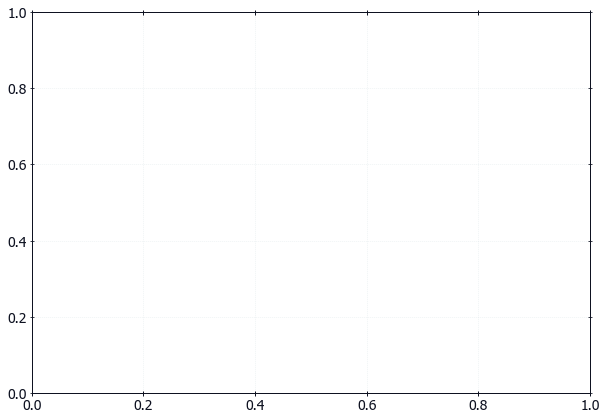

In [69]:
g.plot()